# Initialize and load data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
BERT_DIR = '/content/drive/My Drive/bert_features/'
DATA_DIR = '/content/drive/My Drive/'

In [0]:
import pickle

def unpickle_file(filename):
  f = open(BERT_DIR + filename + ".pkl", "rb")
  features = pickle.load(f)
  f.close()
  return features

In [0]:
bert_nli_stsb_cls_features = unpickle_file('bert_nli_stsb_cls_features')
bert_nli_stsb_features = unpickle_file('bert_nli_stsb_features')
bert_nli_stsb_test_cls_features = unpickle_file('bert_nli_stsb_test_cls_features')
bert_nli_stsb_test_features = unpickle_file('bert_nli_stsb_test_features')

bert_stsbiomedical_cls_features = unpickle_file('bert_stsbiomedical_cls_features')
bert_stsbiomedical_features = unpickle_file('bert_stsbiomedical_features')
bert_stsbiomedical_test_cls_features = unpickle_file('bert_stsbiomedical_test_cls_features')
bert_stsbiomedical_test_features = unpickle_file('bert_stsbiomedical_test_features')

bert_vanilla_cls_features = unpickle_file('bert_vanilla_cls_features')
bert_vanilla_features = unpickle_file('bert_vanilla_features')
bert_vanilla_test_cls_features = unpickle_file('bert_vanilla_test_cls_features')
bert_vanilla_test_features = unpickle_file('bert_vanilla_test_features')

biobert_cls_features = unpickle_file('biobert_cls_features')
biobert_features = unpickle_file('biobert_features')
biobert_test_cls_features = unpickle_file('biobert_test_cls_features')
biobert_test_features = unpickle_file('biobert_test_features')

biobert_stsbiomedical_cls_features = unpickle_file('biobert_stsbiomedical_cls_features')
biobert_stsbiomedical_features = unpickle_file('biobert_stsbiomedical_features')
biobert_stsbiomedical_test_cls_features = unpickle_file('biobert_stsbiomedical_test_cls_features')
biobert_stsbiomedical_test_features = unpickle_file('biobert_stsbiomedical_test_features')

bioclinicalbert_cls_features = unpickle_file('bioclinicalbert_cls_features')
bioclinicalbert_features = unpickle_file('bioclinicalbert_features')
bioclinicalbert_test_cls_features = unpickle_file('bioclinicalbert_test_cls_features')
bioclinicalbert_test_features = unpickle_file('bioclinicalbert_test_features')

clinicalbert_cls_features = unpickle_file('clinicalbert_cls_features')
clinicalbert_features = unpickle_file('clinicalbert_features')
clinicalbert_test_cls_features = unpickle_file('clinicalbert_test_cls_features')
clinicalbert_test_features = unpickle_file('clinicalbert_test_features')

roberta_stsbiomedical_cls_features = unpickle_file('roberta_stsbiomedical_cls_features')
roberta_stsbiomedical_features = unpickle_file('roberta_stsbiomedical_features')
roberta_stsbiomedical_test_cls_features = unpickle_file('roberta_stsbiomedical_test_cls_features')
roberta_stsbiomedical_test_features = unpickle_file('roberta_stsbiomedical_test_features')

In [0]:
bert_nli_stsb_nsp_features = unpickle_file('bert_nli_stsb_NSP_features')
bert_nli_stsb_test_nsp_features = unpickle_file('bert_nli_stsb_test_NSP_features')

clinicalbert_nsp_features = unpickle_file('clinicalbert_NSP_features')
clinicalbert_test_nsp_features = unpickle_file('clinicalbert_test_NSP_features')

biobert_stsbiomedical_nsp_features = unpickle_file('biobert_stsbiomedical_NSP_features')
biobert_stsbiomedical_test_nsp_features = unpickle_file('biobert_stsbiomedical_test_NSP_features')

biobert_nsp_features = unpickle_file('biobert_NSP_features')
biobert_test_nsp_features = unpickle_file('biobert_test_NSP_features')

In [0]:
import pandas as pd

def get_data(file):
  data = pd.read_csv(file, sep='\t', header=None, names=["Sentence #1", "Sentence #2", "Similarity"])
  X = data.values[:, :2]
  y = data['Similarity'].values
  return (X, y)

X_train, y_train = get_data(DATA_DIR + 'clinicalSTS2019.train.txt')

In [0]:
X_test = pd.read_csv(DATA_DIR+'clinicalSTS2019.test.txt', sep='\t', header=None, names=["Sentence #1", "Sentence #2"])
X_test = X_test.values

In [0]:
y_test = pd.read_csv(DATA_DIR + 'clinicalSTS2019.test.gs.sim.txt', sep='\t', header=None, names=["Similarity"])
y_test = y_test.values
y_test = y_test.flatten()

In [0]:
from scipy.stats import pearsonr

def accuracy(y_true, y_hat):
  return pearsonr(y_true, y_hat)[0]

# Regression

In [0]:
import matplotlib.pyplot as plt

def plot_accuracy(y, y_hat):
  print('Accuracy:', accuracy(y, y_hat))
  plt.plot(y, y_hat, 'ro')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Predicted vs Actual')
  plt.show()

Accuracy: 0.6514355440356581


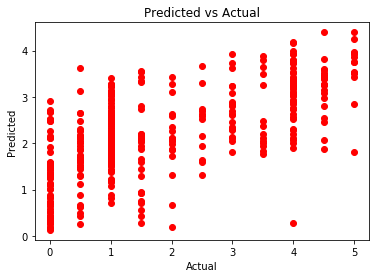

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=2)
gb_model.fit(bert_nli_stsb_features, y_train)
y_hat =gb_model.predict(bert_nli_stsb_test_features)

plot_accuracy(y_test, y_hat)

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

def get_optimal_rf_model(X, y):
    params = {
      'learning_rate': 0.01, 
      'random_state': 598, 
      'max_features': 'sqrt'
    }
    model = GridSearchCV(GradientBoostingRegressor(**params),
                            cv=5,
                            n_jobs=-1,
                            iid=False,
                            param_grid={
                                'n_estimators':[200, 300, 400, 500],
                                'max_depth': [4, 5, 6, 7],
                                'min_samples_split': [2, 4, 6, 8],
                                'subsample': [0.6, 0.7, 0.8]
                            })
    model.fit(X, y)
    print('Optimal parameters:', model.best_params_)
    ml_alg = GradientBoostingRegressor(**params, **model.best_params_)
    return ml_alg

def predict_test(X_train, y_train, reg, X_test):
    reg.fit(X_train, y_train)
    return reg.predict(X_test)

# BERT based feature experiments

Optimal parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.7}
Accuracy: 0.6639792376067208


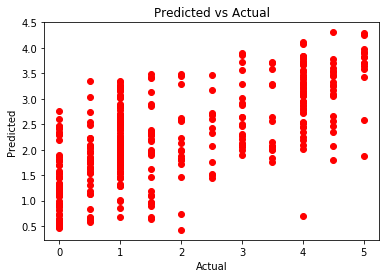

In [0]:
y_test_hat = predict_test(bert_nli_stsb_features, y_train, get_optimal_rf_model(bert_nli_stsb_features[:500], y_train[:500]), bert_nli_stsb_test_features)
plot_accuracy(y_test, y_test_hat)

Optimal parameters: {'max_depth': 4, 'min_samples_split': 6, 'n_estimators': 400, 'subsample': 0.7}
Accuracy: 0.7627932667986288


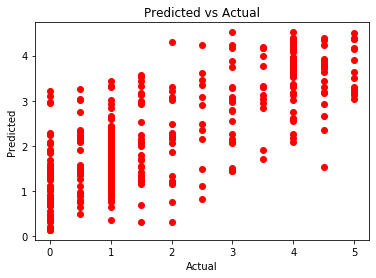

In [0]:
y_test_hat = predict_test(bert_stsbiomedical_features, y_train, get_optimal_rf_model(bert_stsbiomedical_features[:500], y_train[:500]), bert_stsbiomedical_test_features)
plot_accuracy(y_test, y_test_hat)

Optimal parameters: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.6}
Accuracy: 0.4718287101992778


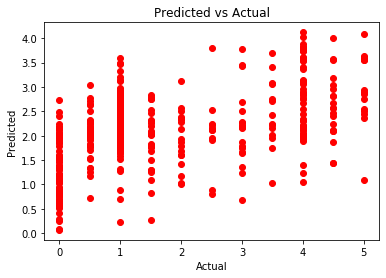

In [0]:
y_test_hat = predict_test(bert_vanilla_features, y_train, get_optimal_rf_model(bert_vanilla_features[:500], y_train[:500]), bert_vanilla_test_features)
plot_accuracy(y_test, y_test_hat)

Optimal parameters: {'max_depth': 4, 'min_samples_split': 8, 'n_estimators': 300, 'subsample': 0.8}
Accuracy: 0.63029091937841


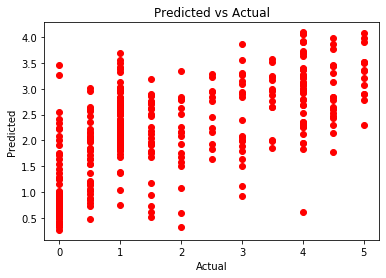

In [0]:
y_test_hat = predict_test(biobert_features, y_train, get_optimal_rf_model(biobert_features[:500], y_train[:500]), biobert_test_features)
plot_accuracy(y_test, y_test_hat)

Optimal parameters: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.7}
Accuracy: 0.8099977294663586


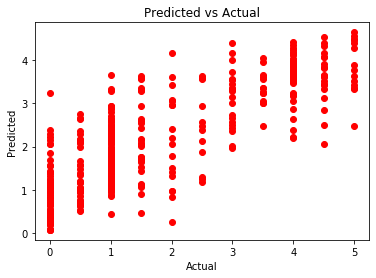

In [0]:
y_test_hat = predict_test(biobert_stsbiomedical_features, y_train, get_optimal_rf_model(biobert_stsbiomedical_features[:500], y_train[:500]), biobert_stsbiomedical_test_features)
plot_accuracy(y_test, y_test_hat)

Optimal parameters: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 500, 'subsample': 0.6}
Accuracy: 0.5709052497984682


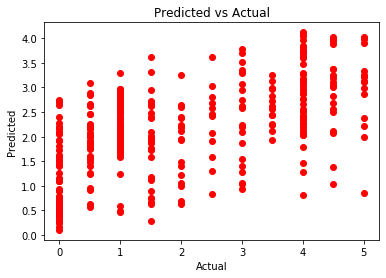

In [0]:
y_test_hat = predict_test(bioclinicalbert_features, y_train, get_optimal_rf_model(bioclinicalbert_features[:500], y_train[:500]), bioclinicalbert_test_features)
plot_accuracy(y_test, y_test_hat)

Optimal parameters: {'max_depth': 7, 'min_samples_split': 6, 'n_estimators': 200, 'subsample': 0.7}
Accuracy: 0.6526442514242445


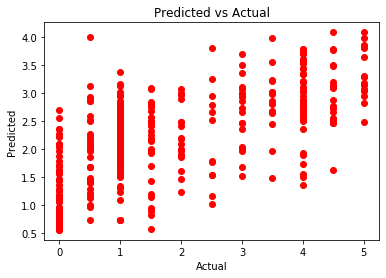

In [0]:
y_test_hat = predict_test(clinicalbert_features, y_train, get_optimal_rf_model(clinicalbert_features[:500], y_train[:500]), clinicalbert_test_features)
plot_accuracy(y_test, y_test_hat)

Optimal parameters: {'max_depth': 4, 'min_samples_split': 8, 'n_estimators': 400, 'subsample': 0.7}
Accuracy: 0.7780771267549416


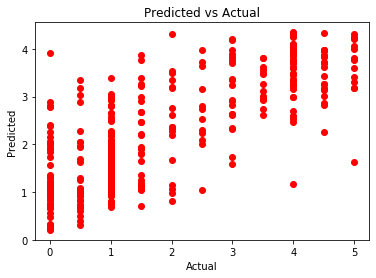

In [0]:
y_test_hat = predict_test(roberta_stsbiomedical_features, y_train, get_optimal_rf_model(roberta_stsbiomedical_features[:500], y_train[:500]), roberta_stsbiomedical_test_features)
plot_accuracy(y_test, y_test_hat)

### Combine all BERT features

In [0]:
train_features_all = np.concatenate([bert_nli_stsb_features, bert_stsbiomedical_features, bert_vanilla_features, biobert_features, biobert_stsbiomedical_features, bioclinicalbert_features, clinicalbert_features, roberta_stsbiomedical_features], axis=1)
test_features_all = np.concatenate([bert_nli_stsb_test_features, bert_stsbiomedical_test_features, bert_vanilla_test_features, biobert_test_features, biobert_stsbiomedical_test_features, bioclinicalbert_test_features, clinicalbert_test_features, roberta_stsbiomedical_test_features], axis=1)

Optimal parameters: {'max_depth': 6, 'min_samples_split': 8, 'n_estimators': 500, 'subsample': 0.7}
Accuracy: 0.8364667265449741


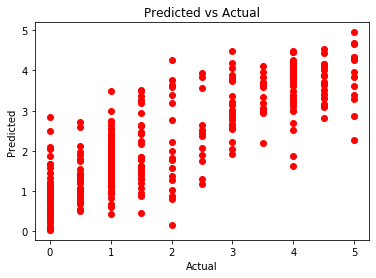

In [0]:
y_test_hat = predict_test(train_features_all, y_train, get_optimal_rf_model(train_features_all[:500], y_train[:500]), test_features_all)
plot_accuracy(y_test, y_test_hat)

# NSP features

Optimal parameters: {'max_depth': 7, 'min_samples_split': 6, 'n_estimators': 500, 'subsample': 0.8}
Accuracy: 0.27573155959810425


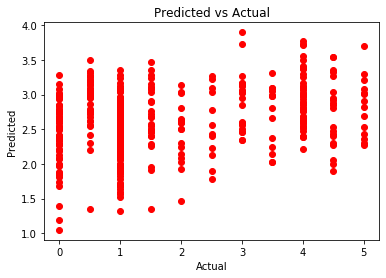

In [0]:
y_test_hat = predict_test(bert_nli_stsb_nsp_features, y_train, get_optimal_rf_model(bert_nli_stsb_nsp_features[:500], y_train[:500]), bert_nli_stsb_test_nsp_features)
plot_accuracy(y_test, y_test_hat)

Optimal parameters: {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 500, 'subsample': 0.7}
Accuracy: 0.10325910695531836


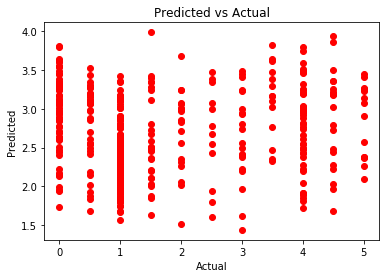

In [0]:
y_test_hat = predict_test(clinicalbert_nsp_features, y_train, get_optimal_rf_model(clinicalbert_nsp_features[:500], y_train[:500]), clinicalbert_test_nsp_features)
plot_accuracy(y_test, y_test_hat)

Optimal parameters: {'max_depth': 6, 'min_samples_split': 4, 'n_estimators': 500, 'subsample': 0.7}
Accuracy: 0.18838053157374154


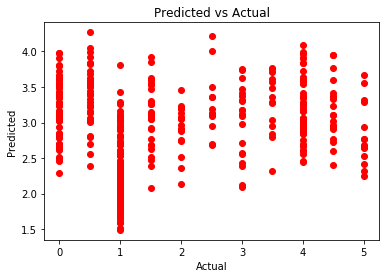

In [0]:
y_test_hat = predict_test(biobert_nsp_features, y_train, get_optimal_rf_model(biobert_nsp_features[:500], y_train[:500]), biobert_test_nsp_features)
plot_accuracy(y_test, y_test_hat)

Optimal parameters: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.6}
Accuracy: 0.11108239250979461


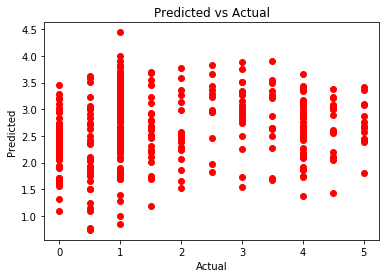

In [0]:
y_test_hat = predict_test(biobert_stsbiomedical_nsp_features, y_train, get_optimal_rf_model(biobert_stsbiomedical_nsp_features[:500], y_train[:500]), biobert_stsbiomedical_test_nsp_features)
plot_accuracy(y_test, y_test_hat)

# cache combined features

In [0]:
def cache_features(name, features, features_test):
  f = open('/content/drive/My Drive/'+name+'_features.pkl', 'wb')
  pickle.dump(features, f)
  f.close()
  f2 = open('/content/drive/My Drive/'+name+'_test_features.pkl', 'wb')
  pickle.dump(features_test, f2)
  f2.close()

In [0]:
#all one sentence features
cache_features('all_bert', train_features_all, test_features_all)

In [0]:
#all NSP features
# not worth it